In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = xr.open_dataset('era5_base_2021.nc')
df

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31T12:00:00
Data variables:
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 11:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
df.sp[0].shape

(1801, 3600)

In [4]:
df.coords

Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31T12:00:00

In [5]:
df.dims

Frozen({'longitude': 3600, 'latitude': 1801, 'time': 365})

In [6]:
df.attrs

{'Conventions': 'CF-1.6',
 'history': '2022-11-28 11:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data7/adaptor.mars.internal-1669636083.8835914-21617-2-64722c98-001c-4c91-b58c-9611ebf19ed8.nc /cache/tmp/64722c98-001c-4c91-b58c-9611ebf19ed8-adaptor.mars.internal-1669636051.7746005-21617-2-tmp.grib'}

In [7]:
#print(df.sp.values)

In [8]:
sp = df.sp.values
sp.shape

(365, 1801, 3600)

Text(0.5, 1.0, 'ERA5-Land Base W/ Pressure')

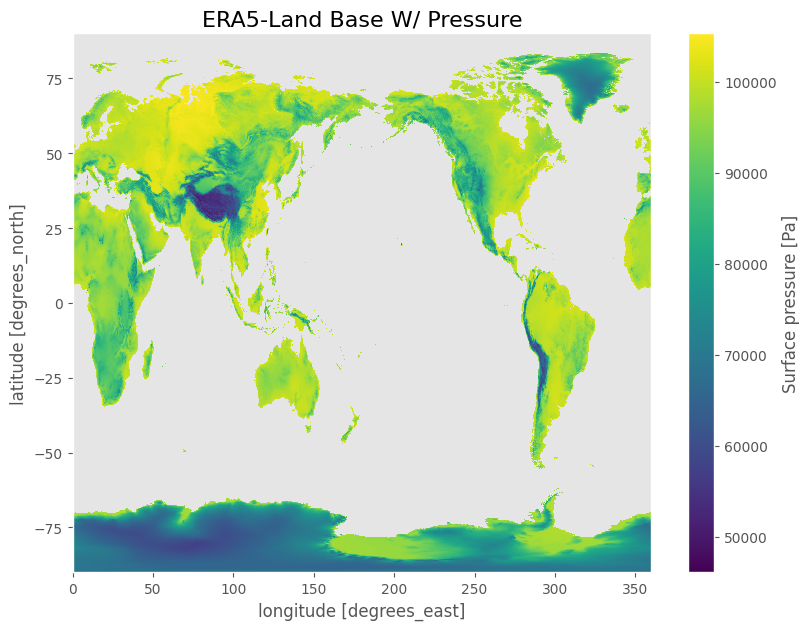

In [9]:
df.sp[0,:,:].plot(size = 7)

title = f'ERA5-Land Base W/ Pressure'       # set the title
plt.title(title, fontsize=16)

In [10]:
df.sp.values[0].shape

(1801, 3600)

In [11]:
df = df.drop_vars("sp")

In [12]:
storm_dir = "./storm_data"
file = os.listdir(storm_dir)[0]
storms_1 = pd.read_csv(storm_dir+f"/{file}", header = None)
storms_1.shape
#Why are there 378,860 entries? I thought 1,000 storms pers file 
#I guess each storm is more than one entry then? Makes sense as they have duration
#With us not taking duration into account we will just map all.

(378861, 13)

In [13]:
#File Data Dictionary
storm_dict = {'year' : 0, #starts 0
              'month': 0,
              'tc_number': 0, #For every year; starts at 0
              'time_step':0, #every 3 hr, For every TC; starts at 0
              'basin_id':0, # 0 = EP, 1 = NA, 2 = NI, 3 = SI, 4 = SP, 5 = WP
              'latitude':0, # Deg, Position of the eye
              'longitude':0, #Deg, Position of the eye. Ranges from 0-360°, with prime meridian at Greenwich.
              'minimum_pressure':0, #hPa
              'maximum_wind_speed':0, #m/s
              'radius_to_max_winds':0, #km
              'category':0,
              'landfall':0, # 0/1
              'dist_land':0} # km

#Notes: long before lat

In [14]:
#Fix headers
storms_1.set_axis(storm_dict.keys(), axis=1, inplace=True)
storms_1.head(3)

,year,month,tc_number,time_step,basin_id,latitude,longitude,minimum_pressure,maximum_wind_speed,radius_to_max_winds,category,landfall,dist_land
0,0.0,3.0,0.0,0.0,3.0,-14.3,69.8,990.802207,18.005554,46.299999,0.0,0.0,815.555655
1,0.0,3.0,0.0,1.0,3.0,-14.1,70.1,990.000000,18.500000,46.299999,0.0,0.0,783.227752
2,0.0,3.0,0.0,2.0,3.0,-13.9,70.4,987.900000,19.900000,46.299999,0.0,0.0,751.645387


In [15]:
#Check if different file types exist in folder, 1 hidden found
for x in os.listdir(storm_dir):
    print(x)

STORM_DATA_IBTRACS_SI_1000_YEARS_6.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_7.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_5.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_4.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_0.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_1.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_3.txt
STORM_DATA_IBTRACS_SI_1000_YEARS_2.txt
STORM_DATA_IBTRACS_EP_1000_YEARS_1.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_1.txt
STORM_DATA_IBTRACS_NA_1000_YEARS_8.txt
STORM_DATA_IBTRACS_NA_1000_YEARS_9.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_0.txt
STORM_DATA_IBTRACS_EP_1000_YEARS_0.txt
STORM_DATA_IBTRACS_EP_1000_YEARS_2.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_2.txt
STORM_DATA_IBTRACS_SP_1000_YEARS_9.txt
STORM_DATA_IBTRACS_SP_1000_YEARS_8.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_3.txt
STORM_DATA_IBTRACS_EP_1000_YEARS_3.txt
STORM_DATA_IBTRACS_EP_1000_YEARS_7.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_7.txt
STORM_DATA_IBTRACS_WP_1000_YEARS_9.txt
STORM_DATA_IBTRACS_WP_1000_YEARS_8.txt
STORM_DATA_IBTRACS_NI_1000_YEARS_6.txt
STORM_DATA_IBTRACS_EP_100

In [17]:
#Check for nulls in files

for x in os.listdir(storm_dir):
    if x.endswith(".txt"):
    #read in storm and create df
        storms = pd.read_csv(storm_dir+f"/{x}", header = None)
        storms.set_axis(storm_dict.keys(), axis=1, inplace=True)
        if storms["latitude"].isnull().sum() >0:
            print(x)

In [87]:
#Build Storm_count DataArray
# More accurately, storm_count represents each 3 hour unit time a storm was present at this coordinate via simulation

#for every file in the storm directory

storm_count_values =[[0] * 3600 for i in range(1801)]
for x in os.listdir(storm_dir):
    
    #read in storm and create df
    storms = pd.read_csv(storm_dir+f"/{x}", header = None)
    storms.set_axis(storm_dict.keys(), axis=1, inplace=True)
    for row_index in range(len(storms)):
            storm_count_values[900- (int(storms.iloc[row_index]["latitude"]*10))][int(storms.iloc[row_index]["longitude"]*10)]+=1



In [91]:
np.savetxt("./storm_counts_array.csv", storm_count_values, delimiter=",")

In [88]:
#flatten array into 1 dimension
values_eda = []
for x in storm_count_values:
    for y in x:
        values_eda.append(y)

count = 0
for x in values_eda:
    if x > 0: count+=1
count

1728382

In [89]:
#ratio of coordinates with a storm ever present
count/len(values_eda)

0.2665775186624715

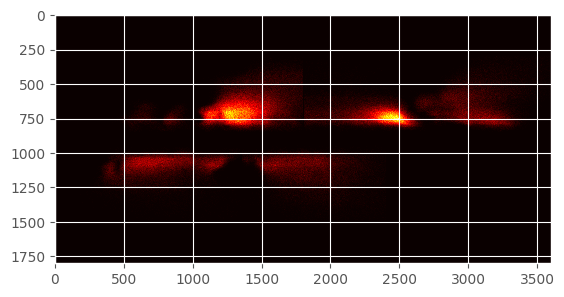

In [90]:
plt.imshow(storm_count_values, cmap='hot', interpolation='nearest')
plt.show()

In [93]:
# Create Max wind Speed variable DataArray
# More accurately, Max wind speed representing each 3 hour unit time a storm was present at this coordinate via simulation

#for every file in the storm directory
max_wind_values =[[[0]] * 3600 for i in range(1801)]
for x in os.listdir(storm_dir):
    
    #read in storm and create df
    storms = pd.read_csv(storm_dir+f"/{x}", header = None)
    storms.set_axis(storm_dict.keys(), axis=1, inplace=True)
    for row_index in range(len(storms)):
            if max_wind_values[900- (int(storms.iloc[row_index]["latitude"]*10))][int(storms.iloc[row_index]["longitude"]*10)] == [0]:
                max_wind_values[900- (int(storms.iloc[row_index]["latitude"]*10))][int(storms.iloc[row_index]["longitude"]*10)] = [storms.iloc[row_index]["maximum_wind_speed"]]
            else:
                max_wind_values[900- (int(storms.iloc[row_index]["latitude"]*10))][int(storms.iloc[row_index]["longitude"]*10)].append(storms.iloc[row_index]["maximum_wind_speed"])


In [94]:
np.savetxt("./max_wind_speeds_array.csv", max_wind_values, fmt='%s')

In [95]:
highest_max_wind_speed = [[0] * 3600 for i in range(1801)]

for row,x in enumerate(max_wind_values):
    for column,y in enumerate(x):
        highest_max_wind_speed[row][column]= max(y)


In [96]:
np.savetxt("./highest_max_wind_speed_array.csv", highest_max_wind_speed, delimiter=",")

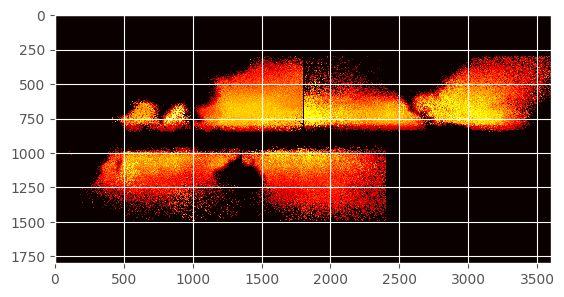

In [97]:
plt.imshow(highest_max_wind_speed, cmap='hot', interpolation='nearest')
plt.show()

## NETCDF Addition Work To Be Checked Below

In [98]:
# Turn all value arrays into xarray DataArrays

storm_count = xr.DataArray(storm_count_values, coords = (np.linspace(90,-90,1801), np.linspace(0,359.9,3600)), dims = ["latitude","longitude"])
max_wind_speeds = xr.DataArray(max_wind_values, coords = (np.linspace(90,-90,1801), np.linspace(0,359.9,3600)), dims = ["latitude","longitude"])
highest_max_wind_speeds = xr.DataArray(highest_max_wind_speed, coords = (np.linspace(90,-90,1801), np.linspace(0,359.9,3600)), dims = ["latitude","longitude"])

storm_count

<xarray.DataArray (latitude: 1801, longitude: 3600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * longitude  (longitude) float64 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9

In [99]:
#create copy of original netcdf dataset 
df2 = df
df2.sp

<xarray.DataArray 'sp' (time: 365, latitude: 1801, longitude: 3600)>
[2366514000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31T12:00:00
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [100]:
#Add all new DataArrays to copy netcdf dataset
df2["storm_count"] = storm_count
df2["max_wind_speeds"] = max_wind_speeds
df2["highest_max_wind_speed"] = highest_max_wind_speeds

#no time component on any of these
df2

<xarray.Dataset>
Dimensions:                 (longitude: 3600, latitude: 1801, time: 365)
Coordinates:
  * longitude               (longitude) float32 0.0 0.1 0.2 ... 359.8 359.9
  * latitude                (latitude) float32 90.0 89.9 89.8 ... -89.9 -90.0
  * time                    (time) datetime64[ns] 2021-01-01T12:00:00 ... 202...
Data variables:
    sp                      (time, latitude, longitude) float32 ...
    storm_count             (latitude, longitude) float64 0.0 nan ... nan nan
    max_wind_speeds         (latitude, longitude) object [0] nan nan ... nan nan
    highest_max_wind_speed  (latitude, longitude) float64 0.0 nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 11:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Netcdf random testing below:

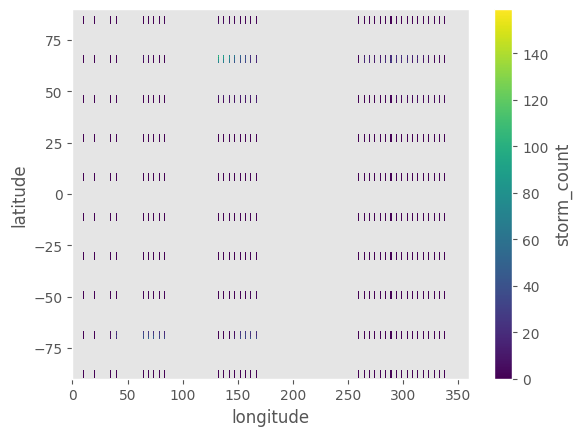

In [214]:
#not sure when I try it this way it shows up like this 
df2.storm_count.plot()

In [219]:
df.sp.values[0]

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [68257.484, 68256.555, 68255.625, ..., 68258.414, 68258.414,
        68257.484],
       [68237.   , 68237.   , 68236.07 , ..., 68238.86 , 68237.93 ,
        68237.93 ],
       [68391.555, 68391.555, 68391.555, ..., 68391.555, 68391.555,
        68391.555]], dtype=float32)

In [217]:
df.storm_count.values[0]

array([ 0., nan, nan, ..., nan, nan, nan])

In [221]:
df2.dims

Frozen({'longitude': 3600, 'latitude': 1801, 'time': 365})

In [233]:
df3 = df2
df3 = df3.expand_dims("time")
df3

ValueError: Dimension time already exists.

In [242]:
df_masked = df2.where(df2 != df2.storm_count(np.nan))
df_masked.storm_count.plot()

TypeError: 'DataArray' object is not callable

In [237]:
df2

<xarray.Dataset>
Dimensions:          (longitude: 3600, latitude: 1801, time: 365)
Coordinates:
  * longitude        (longitude) float32 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
  * latitude         (latitude) float32 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * time             (time) datetime64[ns] 2021-01-01T12:00:00 ... 2021-12-31...
Data variables:
    sp               (time, latitude, longitude) float32 nan nan ... 6.905e+04
    storm_count      (latitude, longitude) float64 0.0 nan nan ... nan nan nan
    max_wind_speeds  (latitude, longitude) object [0] nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-28 11:49:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...